<a href="https://colab.research.google.com/github/FoxWithBoot/Fibonacci-rabbits/blob/main/%D0%9A%D1%80%D0%BE%D0%BB%D0%B8%D0%BA%D0%B8%20(%D1%87%D0%B8%D1%81%D0%BB%D0%B0)%20%D0%A4%D0%B8%D0%B1%D0%BE%D0%BD%D0%B0%D1%87%D1%87%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Кролики Фибоначчи (числа Фибоначчи)

## Описание задачи
В изолированное место поместили пару кроликов, природа которых такова, что любая пара кроликов производит на свет другую пару каждый месяц, начиная со второго месяца своего существования (при этом кролики не умирают). Сколько пар кроликов будет через год? (Вывести число из последовательности Фибонначи по его номеру в последовательности).

## Решения
Для поиска ответа на эту задачу используется рекуррентная числовая последовательность, называемая - числа Фибоначчи: 

0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987…

**Каждый член последовательности равен сумме двух предыдущих:** $a_{n}$=$a_{n-1}$+$a_{n-2}$ или $a_{n+1}$=$a_{n}$+$a_{n-1}$


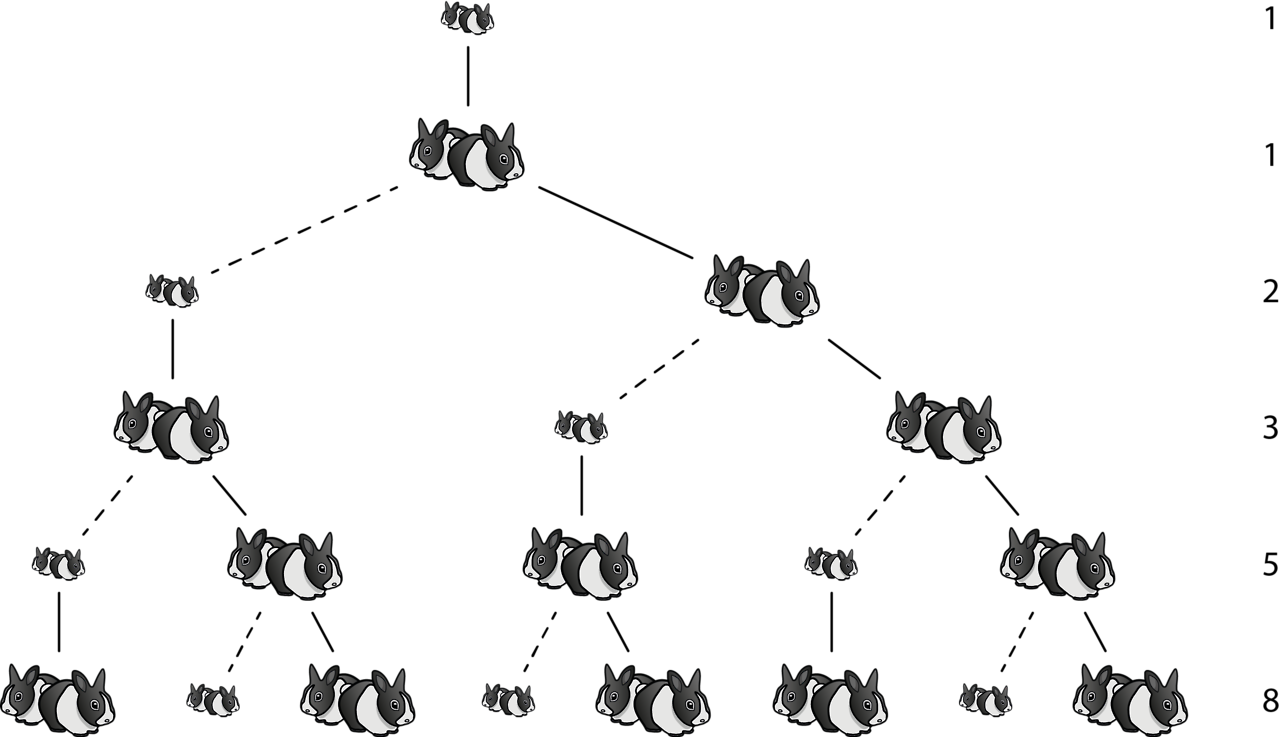

### Решение через рекурсию
С помощью рекурсивного вызова алгоритм проходит по каждой ветке дерева кроликов (рисунок выше).

In [201]:
def fib(n):
  if n<2:
    return n
  return fib(n-1)+fib(n-2)

fib(10)

55

### Итерационное решение
Более оптимальный алгоритм решения, так как он не проходит по всем ветвям дерева (что может занять много времени), а просто хранит в памяти два предыдущих значения последовательности, то есть количество взрослых/старых кроликов и новорожденных/молодых на каждом шаге.

In [3]:
def rabbits(generation):
  young=1
  old=0
  for i in range(generation):
    old,young = old+young,old
  return old

rabbits(10)

55

Количество пар взрослых кролликов на текущем шаге равно сумме кол-ва пар молодых и взрослых кролликов на предыдущем шаге. Кол-во пар молодых кролликов на текущем шаге равно кол-ву пар взрослых кроликов на текущем шаге, так как каждая пара взрослых кроликов порождает ОДНУ пару молодых.

# Кролики Фибоначчи с большим потомством


## Описание задачи
Это модификация классической задачи про кролликов, но в этом варианте пара кролликов порождает не одну пару новых кролликов, а несколько.

## Решения
Для решения данной задачи необходимо преобразовать классическую формулу последовательности Фибоначчи следующим образом: $a_{n}$=$a_{n-1}$+k*$a_{n-2}$, где k - количество пар кролликов в помете (в классическом варианте задачи k=1).

### Рекурсивное решение

In [202]:
def fib(n, k):
  if n<2:
    return n
  return fib(n-1, k)+fib(n-2, k)*k

fib(10, 2)

341

### Итерационное решение

In [165]:
def rabbits(generation, brood=1):
  young=1
  old=0
  for i in range(generation):
    old,young = old+young,old*brood
  return old

rabbits(10, 2)

341

Количество пар взрослых кролликов на текущем шаге равно сумме кол-ва пар молодых и взрослых кролликов на предыдущем шаге. Кол-во пар молодых кролликов на текущем шаге равно кол-ву пар взрослых кроликов на текущем шаге, так как каждая пара взрослых кроликов порождает k пар (в примере выше 2 пары) молодых кроликов.

# Кролики Фибоначчи, которые плодятся раз в несколько месяцев

## Описание задачи
В этой модификации задачи кролики плодятся раз в несколько месяцев, а не каждый месяц (в помете одна пара кроликов).

## Решения
Решение этой модификации также можно записать одной формулой: $a_{n}$=$a_{n-m}$+$a_{n-m-1}$, где m - число месяцев (в классич. варианте m=1).

### Рекурсивное решение

In [203]:
def fib(n, m=1):
  if n<m+1:
    return 1 if n>0 else 0
  return fib(n-m, m)+fib(n-m-1, m)

fib(10, 3)

4

### Итерационное решение

In [204]:
def rabbits(generation, month=1):
  young=1
  old=0
  arr = [0]*(month+1)
  for i in range(generation+1):
    old,young = arr[0]+arr[1],arr[0]
    if i < month+1 and i>0:
      old=1
      yong=0
    arr.append(old)
    arr.pop(0)
  return old

rabbits(10, 3)

4

При итерационном подходе необходимо хранить количество пар кроликов в определенном диапазоне месяцев (размер диапазона равен количесву месяцев за которое кроллики приносят потомство). Массив организован, как очередь (первым пришел - первым ушел). На каждой итерации берутся первое ($a_{n-m-1}$) и втрое ($a_{n-m}$) значение из массива, их сумма записывается в конец массива, а первый элемент удаляется. 

# Кролики Фибоначчи, которые умирают

## Описание задачи
В данной варианции кролики смертны и умирают раз в несколько месяцев.

## Решения
Для этой модификации потребуется более сложная формула: $a_{n}$=$a_{n-1}$+$a_{n-2}-a_{n-l-2}$, где $l$-кол-во месяцев, которое живет кролик. При этом, если n равно 0 или -1, то $a_{n}$ принимается равным 1.

### Рекурсивное решение

In [205]:
def fib(n, l=1):
  if n<2:
    if n==-1 or n==0:
      return 1
    if n<-1:
      return 0
    return n
  return fib(n-1, l)+fib(n-2, l)-fib(n-l-2, l)

fib(10, 4)

61

### Итерационное решение

In [170]:
from queue import Queue
def rabbits(generation, lifetime=1):
  q = Queue()
  for i in range(lifetime+1):
    q.put(0) 
  q.put(1)
  young=1
  old=0
  for i in range(generation+1):
    old,young = old+young-q.get(),old
    q.put(old)
  return old

rabbits(10, 4)

61

Так же как и в решении для кроликов плодящихся раз в несколько месяцев в этом алгоритме используется очередь для записи значений предшествующих $a_{n}$.